<a href="https://colab.research.google.com/github/shilpa2503/Machine-Learning/blob/main/pytorch_Tutorial07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Machinde learning pipeline
# 1. Design model(input size, output size, forward pass)
# 2. Costrcut loss and optimizer
# 3. Training loop:
#    -Compute forward pass
#    -Backkward pass: Compute gradients
#    -Update weights. 

In [ ]:
import torch
import torch.nn as nn 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
#Step 0: Pre process datasets 
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))

Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y=Y.view(Y.shape[0],1)

n_samples, n_features = X.shape


In [ ]:
#Step 1: Desin model 
input_size = n_features
output_size = 1
learning_rate = 0.01
model = nn.Linear(input_size, output_size)


In [ ]:
#Step 2: Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
#Step 3: Training loop
n_iters = 500

for epoch in range(n_iters):
  #forward pass and loss
  y_pred = model(X)

  #loss
  loss = criterion(y_pred,Y)

  #backward pass --- Computing gradients
  loss.backward()
  
  #update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1 ) % 50 == 0:
    print(f'Epoch :{epoch + 1} and Loss for each step :{loss.item():0.8f}')

Epoch :50 and Loss for each step :332.56777954
Epoch :100 and Loss for each step :332.56762695
Epoch :150 and Loss for each step :332.56756592
Epoch :200 and Loss for each step :332.56753540
Epoch :250 and Loss for each step :332.56756592
Epoch :300 and Loss for each step :332.56756592
Epoch :350 and Loss for each step :332.56756592
Epoch :400 and Loss for each step :332.56756592
Epoch :450 and Loss for each step :332.56756592
Epoch :500 and Loss for each step :332.56756592


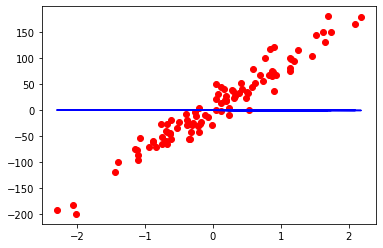

In [ ]:
#plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()